In [686]:
import random
import math
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [687]:
import datetime

In [688]:
from datetime import date,timedelta

In [253]:
from datetime import datetime
then = datetime(2012, 3, 5, 23, 8, 15)        # Random date in the past
now  = datetime.now()                         # Now
duration = now - then                         # For build-in functions
duration_in_s = duration.total_seconds() 

In [19]:
df=pd.read_excel("USCAP.xlsx")

In [723]:
dfLarge=pd.read_csv("USCAP_Large.csv")

In [724]:
dfLarge.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'TAT', 'SEX',
       'AGE', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'SIZE', 'MOLECULAR ',
       'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION', 'VAF',
       'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS', 'Medullary'],
      dtype='object')

In [59]:
dataframe.shape[0]

NameError: name 'dfLarge' is not defined

In [684]:
df["DIAGNOSIS"].unique()

array(['Thyroid, Left, Fine Needle Aspiration; Smears and ThinPrep: Follicular cells with architectural atypia (Bethesda category III: Atypia of Undetermined Significance). Note: Thyroseq testing to follow. ',
       'Thyroid, Right Anterior, Fine Needle Aspiration; Smears and ThinPrep: PAPILLARY THYROID CARCINOMA (Bethesda category VI: Malignant). ',
       'Thyroid, Right Posterior, Fine Needle Aspiration; Smears and ThinPrep: PAPILLARY THYROID CARCINOMA (Bethesda category VI: Malignant). ',
       'Thyroid, Right Middle, Fine Needle Aspiration; Smears and ThinPrep: Benign follicular nodule (Bethesda category II: Benign). ',
       'Thyroid, Right, Fine Needle Aspiration; Smears and ThinPrep: Benign follicular nodule with cystic change (Bethesda category II: Benign). ',
       'Thyroid, Left, Fine Needle Aspiration; Smears and ThinPrep: Follicular cells with cytologic and architectural atypia (Bethesda category III: Atypia of Undetermined Significance). ',
       'Thyroid, Right Infe

In [660]:
for col in ["ACCESS_DATE","SIGN_DATE"]:
    dfLarge[col]=dfLarge[col].apply(lambda z:pd.Timestamp(z))


In [668]:
min(list(dfLarge["SIGN_DATE"]))

Timestamp('2018-01-03 00:00:00')

In [677]:
max(list(dfLarge["SIGN_DATE"]))

Timestamp('2022-07-29 00:00:00')

In [670]:
first_day=min(dfLarge["SIGN_DATE"].to_list())
last_day=max(dfLarge["SIGN_DATE"].to_list())

In [672]:
first_day

Timestamp('2018-01-03 00:00:00')

In [664]:
dfLarge.shape

(7537, 28)

In [654]:
df.dtypes

YEAR                           int64
SURGICAL_NUMBER               object
ACCESS_DATE           datetime64[ns]
SIGN_DATE             datetime64[ns]
SEX                           object
AGE                            int64
DIAGNOSIS                     object
SITE                          object
RIGHT                          int64
LEFT                           int64
ISTHMUS                        int64
LATERALITY                    object
Bethesda Cathegory             int64
CYTOPATHOLOGIST              float64
CYTOTECHNOLOGIST              object
SIZE                         float64
MOLECULAR                     object
ADEQUACY                      object
RESULT                        object
ROM                           object
GENE MUTATED                  object
MUTATION                      object
VAF                           object
FUSIONS                       object
 CNV                         float64
GEP                           object
PTH                          float64
 

In [653]:
dfLarge.dtypes

YEAR                           int64
SURGICAL_NUMBER               object
ACCESS_DATE           datetime64[ns]
SIGN_DATE             datetime64[ns]
TAT                            int64
SEX                           object
AGE                            int64
SITE                          object
RIGHT                        float64
LEFT                         float64
ISTHMUS                      float64
LATERALITY                    object
Bethesda Cathegory             int64
CYTOPATHOLOGIST                int64
SIZE                         float64
MOLECULAR                     object
ADEQUACY                      object
RESULT                        object
ROM                          float64
GENE MUTATED                  object
MUTATION                      object
VAF                           object
FUSIONS                       object
 CNV                          object
GEP                           object
PTH                           object
 C-CELLS                     float64
M

In [624]:
dataframe=pd.read_csv("USCAP_Large.csv")

In [623]:
dataframe

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,TAT,SEX,AGE,SITE,RIGHT,LEFT,...,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS,Medullary
0,2018,UC18-2798,4/5/2018,4/9/2018,4,Female,66,Thyroid,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2018,UC18-2797,4/5/2018,4/9/2018,4,Female,66,Thyroid,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2018,UC18-2791,4/5/2018,4/9/2018,4,Female,66,Thyroid,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2018,UC18-1117,2/7/2018,2/8/2018,1,Male,60,Thyroid,0.0,1.0,...,60.0,DICER1,D17096,37,0,0,0,0,0.0,0.0
4,2018,UC18-2869,4/9/2018,4/12/2018,3,Male,62,Thyroid,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [498]:
df["Bethesda Cathegory"].unique()

array([3, 6, 2, 4, 5, 1])

In [332]:
df["RESULT"].unique()

array(['NEGATIVE', nan, 'POSITIVE', 'FAILED'], dtype=object)

In [335]:
data=df

In [338]:
positive_data=data[data["RESULT"]=="POSITIVE"]
negative_data=data[data["RESULT"]=="NEGATIVE"]
category3_data=data[data["Bethesda Cathegory"]==3]
category4_data=data[data["Bethesda Cathegory"]==4]

In [351]:
df[["GENE MUTATED","RESULT"]].value_counts()

GENE MUTATED      RESULT  
0                 NEGATIVE    19
TSHR              NEGATIVE     5
HRAS              POSITIVE     3
NRAS              POSITIVE     3
0                 FAILED       2
                  POSITIVE     2
EZH1              NEGATIVE     2
BRAF              POSITIVE     1
GNAS              NEGATIVE     1
TERT,PIK3CA,PTEN  POSITIVE     1
dtype: int64

In [364]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [357]:
medicos=list(df["CYTOPATHOLOGIST"].unique())

In [360]:
medicos=[x for x in medicos if str(x) !="nan"]

In [361]:
medicos

[9.0, 2.0, 12.0, 7.0, 5.0]

In [382]:
def pos(x):
    ans=0
    if x in medicos:
        ans= df[(df["CYTOPATHOLOGIST"]==x)&(df["RESULT"]=="POSITIVE")].shape[0]/df[df["CYTOPATHOLOGIST"]==x].shape[0]
    return ans

In [383]:
for x in medicos:
    print(pos(x))

0.04
0.07407407407407407
0.06060606060606061
0.03225806451612903
0.05


In [384]:
positivity=[pos(x) for x in medicos]

In [386]:
category=[catIII(x) for x in medicos]

In [387]:
positivity

[0.04, 0.07407407407407407, 0.06060606060606061, 0.03225806451612903, 0.05]

In [388]:
category

[0.16, 0.2222222222222222, 0.18181818181818182, 0.0967741935483871, 0.3]

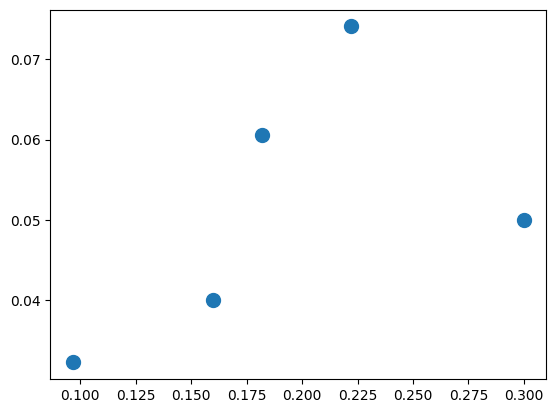

In [390]:
import matplotlib.pyplot as plt
_ = plt.plot(category,positivity, 'o', label='Original data', markersize=10)
plt.show()

In [385]:
def catIII(x):
    ans=0
    if x in medicos:
        ans= df[(df["CYTOPATHOLOGIST"]==x)&(df["Bethesda Cathegory"]==3)].shape[0]/df[df["CYTOPATHOLOGIST"]==x].shape[0]
    return ans
    

In [ ]:
catIII

In [344]:
negative_data.head()

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
14,2021,DEMO-21-8516,2021-12-17,2021-12-21,Female,74,"Thyroid, Left Middle, Fine Needle Aspiration; ...",Thyroid,0,1,...,NEGATIVE,3,0,0,0,0,0.0,0,0.0,0.0
15,2021,DEMO-21-8517,2021-12-17,2021-12-21,Female,68,"Thyroid, Left Middle, Fine Needle Aspiration; ...",Thyroid,0,1,...,NEGATIVE,3,EZH1,Y642F,9,0,0.0,0,0.0,0.0
27,2021,DEMO-21-8616,2021-12-21,2021-12-27,Female,60,"Thyroid, Right Inferior, Fine Needle Aspiratio...",Thyroid,1,0,...,NEGATIVE,3,GNAS,Q227H,25,0,0.0,0,0.0,0.0
33,2021,DEMO-21-8633,2021-12-21,2021-12-23,Female,57,"Thyroid, Left Lobe, Fine Needle Aspiration; Sm...",Thyroid,0,1,...,NEGATIVE,3,0,0,0,0,0.0,0,0.0,0.0


In [337]:
positive_data=data[data["RESULT"]=="POSITIVE"]
negative_data=data[data["RESULT"]=="NEGATIVE"]
category3_data=data[data["Bethesda Cathegory"]==3]
category4_data=data[data["Bethesda Cathegory"]==4]

In [334]:
df["Bethesda Cathegory"].unique()

array([3, 6, 2, 4, 5, 1])

In [280]:
access=df["ACCESS_DATE"].to_list()

In [281]:
sign=df["SIGN_DATE"].to_list()

In [282]:
import itertools

In [296]:
duration= [(sign[i]-access[i]).days for i in range(len(df))]

In [298]:
set(duration)

{1, 2, 3, 4, 5, 6, 7, 8}

In [292]:
sign[1]-access[1]

Timedelta('5 days 00:00:00')

In [290]:
access[:5]

[Timestamp('2021-02-11 00:00:00'),
 Timestamp('2021-12-15 00:00:00'),
 Timestamp('2021-12-15 00:00:00'),
 Timestamp('2021-02-11 00:00:00'),
 Timestamp('2021-12-16 00:00:00')]

In [288]:
duration

[Timedelta('-5 days +00:00:00'),
 Timedelta('302 days 00:00:00'),
 Timedelta('302 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('303 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('304 days 00:00:00'),
 Timedelta('-5 days +00:00:00'),
 Timedelta('307 days 00:00:00'),
 Timedelta('307 days 00:00:00'),
 Timedelta('307 days 00:00:00'),
 Timedelta('308 days 00:00:00'),
 Timedelta('308 days 00:00:00'),
 Timedelta('308 days 00:00:00'),
 Timedelta('308 days 00:00:00'),
 Timedelta

In [260]:
4003*60*60*24

345859200

In [182]:
import matplotlib

In [264]:
df=pd.read_excel("USCAP.xlsx")

In [326]:
df["RESULTS"].unique()

KeyError: 'RESULTS'

In [184]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [299]:
df["difference"]=df["SIGN_DATE"]-df["ACCESS_DATE"]

In [319]:
medicos=df["CYTOPATHOLOGIST"].unique()

In [321]:
cases=dict()

In [322]:
for medico in medicos:
    cases[medico]=df[df["CYTOPATHOLOGIST"]==medico].shape[0]

In [323]:
cases

{9.0: 50, 2.0: 27, 12.0: 66, 7.0: 31, 5.0: 20, nan: 0}

In [317]:
df.describe()

,YEAR,AGE,RIGHT,LEFT,ISTHMUS,Bethesda Cathegory,CYTOPATHOLOGIST,SIZE,CNV,PTH,C-CELLS,difference
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,194.000000,35.000000,39.000000,39.0,39.0,195
mean,2021.538462,55.420513,0.487179,0.415385,0.097436,2.400000,8.314433,3.092857,0.025641,0.0,0.0,4 days 01:06:27.692307692
std,0.499802,13.601379,0.501122,0.494057,0.297314,1.032463,3.429391,3.864744,0.160128,0.0,0.0,1 days 12:10:04.963927052
min,2021.000000,16.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.400000,0.000000,0.0,0.0,1 days 00:00:00
25%,2021.000000,46.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1.430000,0.000000,0.0,0.0,3 days 00:00:00
50%,2022.000000,56.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,0.000000,0.0,0.0,4 days 00:00:00
75%,2022.000000,63.500000,1.000000,1.000000,0.000000,3.000000,12.000000,3.000000,0.000000,0.0,0.0,5 days 00:00:00
max,2022.000000,86.000000,1.000000,1.000000,1.000000,6.000000,12.000000,23.000000,1.000000,0.0,0.0,8 days 00:00:00


In [185]:
explainer= dict()

In [186]:
explainer["ROM"]= "Risk of malignancy"
explainer["VAF"]="Variant Allele frequency"
explainer["CNV"]="Copy number variations"
explainer["GEP"]="Gene expression profile"
explainer["PTH"]="Parathoyd hormone"
explainer["C-CELLS"]="A type of cell in the thyroid. C cells make calcitonin, a hormone that helps control the calcium level in the blood."

In [249]:
df["FUSIONS"].value_counts()

0             38
PAX8/PPARG     1
Name: FUSIONS, dtype: int64

In [244]:
df["GEP"].value_counts()

0           33
SLC5A5       3
POSITIVE     3
Name: GEP, dtype: int64

In [233]:
for key in libro.keys():
    libro[key]=[libro[key]]

In [223]:
data

{'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

In [234]:
pd.DataFrame.from_dict(libro)

,0,Q61R,"L512R,c.1535T>G",Y642F,Q227H,Q61K,D633H,Q571R,V600E,SLC5A5,M453T,"H1047R,D77Afs*22,C228T",S281N
0,23,5,1,1,1,1,1,1,1,1,1,1,1


In [215]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [219]:
data

{'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

In [214]:
pd.DataFrame.from_dict(a)

ValueError: If using all scalar values, you must pass an index

In [22]:
pathos=df["CYTOPATHOLOGIST"].tolist()

In [24]:
pathos=list(map(lambda z: "CYTOPATHOLOGIST "+ str(int(z)),pathos))

ValueError: cannot convert float NaN to integer

In [16]:
df.head()

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
1,2021,DEMO-21-8458,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Anterior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,DEMO-21-8459,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Posterior, Fine Needle Aspirati...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,DEMO-21-847,2021-02-11,2021-02-16,Female,48,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,DEMO-21-8476,2021-12-16,2021-12-20,Female,64,"Thyroid, Right, Fine Needle Aspiration; Smears...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
explainer

{'ROM': 'Risk of malignancy',
 'VAF': 'Variant Allele frequency',
 'CNV': 'Copy number variations',
 'GEP': 'Gene expression profile',
 'PTH': 'Parathoyd hormone',
 'C-CELLS': 'A type of cell in the thyroid. C cells make calcitonin, a hormone that helps control the calcium level in the blood.'}

In [7]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [8]:
df[" CNV"].head()

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
Name:  CNV, dtype: float64

In [5]:
cat=len(df[df["Bethesda Cathegory"]==3])

In [6]:
100*cat/len(df)

17.94871794871795

In [20]:
df

NameError: name 'df' is not defined

In [20]:
df[""]

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [28]:
df["GEP"].describe

<bound method NDFrame.describe of 0      SLC5A5
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
190       NaN
191       NaN
192       NaN
193       NaN
194         0
Name: GEP, Length: 195, dtype: object>

In [16]:
set(df["RESULT"].tolist())

{'FAILED', 'NEGATIVE', 'POSITIVE', nan}

In [33]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 1, 4, 6, 7, 5, 9, 7, 8]
))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=0
    ),
   
)

fig.show()

In [7]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [15]:
df[["ACCESS_DATE","SIGN_DATE"]]

,ACCESS_DATE,SIGN_DATE
0,2021-02-11,2021-02-16
1,2021-12-15,2021-12-20
2,2021-12-15,2021-12-20
3,2021-02-11,2021-02-16
4,2021-12-16,2021-12-20
...,...,...
190,2022-01-03,2022-01-05
191,2022-03-03,2022-03-07
192,2022-03-03,2022-03-07
193,2022-03-03,2022-03-07


In [16]:
fechas=df["SIGN_DATE"].to_list()

In [29]:
import datetime

In [30]:
from datetime import date, timedelta

In [24]:
min(fechas)

Timestamp('2021-01-11 00:00:00')

pandas._libs.tslibs.timestamps.Timestamp

In [31]:
hoy=date.today()

In [40]:
hoy

datetime.date(2023, 2, 13)

In [41]:
ayer=hoy.replace(day=hoy.day-1)

In [67]:
del(list)

In [223]:
pathologists=df["CYTOPATHOLOGIST"].tolist()

In [224]:
pathologists=[x for x in pathologists if str(x) !="nan"]

In [225]:
pathologists

['Pathologist 9',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 12',
 'Pathologist 12',
 'Pathologist 12',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 12',
 'Pathologist 12',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 12',
 'Pathologist 7',
 'Pathologist 12',
 'Pathologist 7',
 'Pathologist 9',
 'Pathologist 7',
 'Pathologist 12',
 'Pathologist 9',
 '

In [222]:
pathologists=list(map(lambda z:int(z),pathologists))

ValueError: invalid literal for int() with base 10: 'Pathologist 9'

In [109]:
pathologists

[9,
 2,
 2,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 9,
 2,
 9,
 2,
 9,
 12,
 12,
 12,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 12,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 7,
 12,
 7,
 9,
 7,
 12,
 9,
 9,
 12,
 9,
 7,
 2,
 2,
 2,
 2,
 2,
 9,
 2,
 2,
 2,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 7,
 7,
 5,
 5,
 12,
 12,
 12,
 12,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 12,
 12,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 7,
 7,
 7,
 12,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 12,
 5,
 12,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 12,
 5,
 5,
 5,
 5,
 5,
 12,
 5,
 5,
 5,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 2,
 12,
 12,
 12,
 12]

In [113]:
set(pathologists)

{'Pathologist 12',
 'Pathologist 2',
 'Pathologist 5',
 'Pathologist 7',
 'Pathologist 9'}

In [111]:
pathologists=[ "Pathologist "+str(x) for x in pathologists]

In [112]:
pathologists

['Pathologist 9',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 9',
 'Pathologist 12',
 'Pathologist 12',
 'Pathologist 12',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 12',
 'Pathologist 12',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 9',
 'Pathologist 12',
 'Pathologist 7',
 'Pathologist 12',
 'Pathologist 7',
 'Pathologist 9',
 'Pathologist 7',
 'Pathologist 12',
 'Pathologist 9',
 '

In [61]:
a=[1,3,4]

In [62]:
b=list(lambda z:2*z,a))

TypeError: 'list' object is not callable

In [66]:
list

[9.0,
 2.0,
 2.0,
 9.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 9.0,
 2.0,
 9.0,
 2.0,
 9.0,
 12.0,
 12.0,
 12.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 12.0,
 12.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 12.0,
 7.0,
 12.0,
 7.0,
 9.0,
 7.0,
 12.0,
 9.0,
 9.0,
 12.0,
 9.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 9.0,
 2.0,
 2.0,
 2.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 7.0,
 7.0,
 5.0,
 nan,
 5.0,
 12.0,
 12.0,
 12.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 12.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 5.0,
 7.0,
 7.0,
 7.0,
 12.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 12.0,
 5.0,
 12.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 12.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 12.0,
 5.0,
 5.0,
 5.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 

In [63]:
list(map(lambda n: n * 2, [1, 2, 3, 4, 5]))

TypeError: 'list' object is not callable

In [221]:
pathologists=df["CYTOPATHOLOGIST"].tolist()
pathologists=[x for x in pathologists if str(x) !="nan"]
pathologists=list(map(lambda z:"Pathologist "+str(int(z)),pathologists))
pathologists=list(set(pathologists))
pathologists=["All Pathologists"]+pathologists


ValueError: invalid literal for int() with base 10: 'Pathologist 9'

In [115]:
pathologists

['All Pathologists',
 'Pathologist 9',
 'Pathologist 2',
 'Pathologist 5',
 'Pathologist 7',
 'Pathologist 12']

In [117]:
df["AGE"].describe()

count    195.000000
mean      55.420513
std       13.601379
min       16.000000
25%       46.000000
50%       56.000000
75%       63.500000
max       86.000000
Name: AGE, dtype: float64

In [118]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [119]:
# datetime(year, month, day, hour, minute, second)
a = datetime.datetime(2017, 6, 21, 18, 25, 30)
b = datetime.datetime(2017, 5, 16, 8, 21, 10)
  
# returns a timedelta object
c = a-b 
print('Difference: ', c)
  
minutes = c.total_seconds() / 60
print('Total difference in minutes: ', minutes)
  
# returns the difference of the time of the day
minutes = c.seconds / 60
print('Difference in minutes: ', minutes)


Difference:  36 days, 10:04:20
Total difference in minutes:  52444.333333333336
Difference in minutes:  604.3333333333334


In [123]:
df["new_column"] = df.apply(lambda x: x["SIGN_DATE"] - x["ACCESS_DATE"], axis = 1)

In [125]:
tiempos=df["new_column"].tolist()

In [128]:
type(tiempos[0]).todate

pandas._libs.tslibs.timedeltas.Timedelta

In [129]:
tiempos=list(map(lambda z:z.days,tiempos))

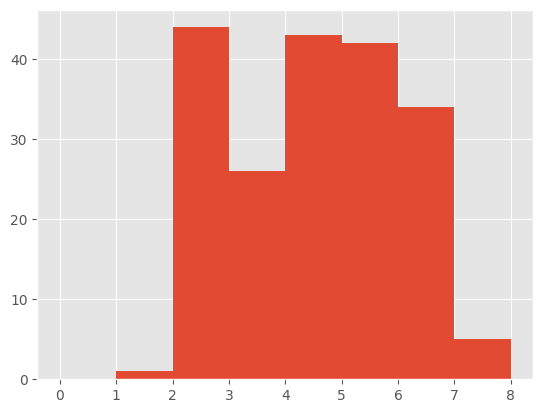

In [142]:
import matplotlib.pyplot as plt


plt.hist(tiempos,bins=list(range(0,9)))
plt.style.use('ggplot')
plt.show()

In [144]:
np.mean(tiempos)

4.046153846153846

In [148]:
cats=df["Bethesda Cathegory"].to_list()
cats=[x for x in cats if str(x) !="nan"]

In [149]:
cats

[3,
 6,
 6,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 5,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 6,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 6,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 6,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 6,
 3,
 2,
 3,
 1,
 1,
 3,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 1,
 3,
 5,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 6,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 2,
 6,
 2,
 2,
 1,
 3]

(array([ 12., 131.,  35.,   5.,  12.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

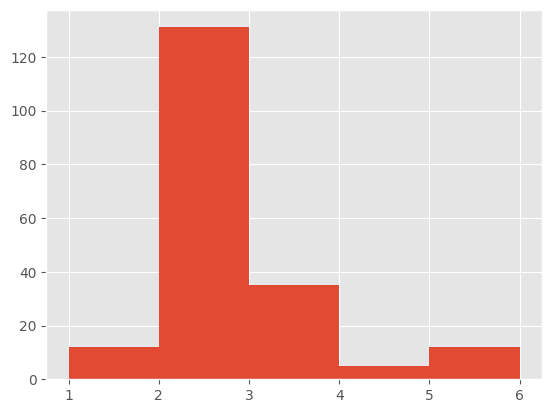

In [150]:
plt.hist(cats,bins=list(range(1,7)))

In [153]:
df["Bethesda Cathegory"].unique()

array([3, 6, 2, 4, 5, 1])

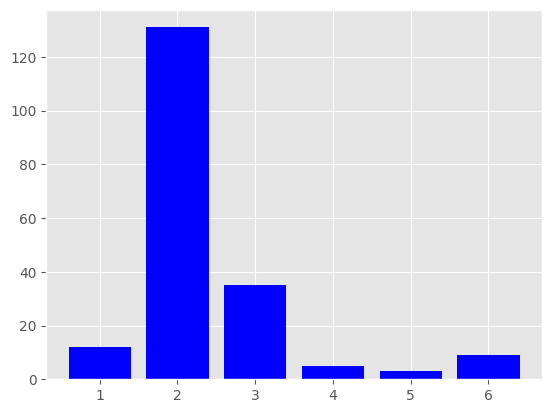

In [156]:


labels, counts = np.unique(cats, return_counts=True)
plt.bar(labels, counts, align='center',color="blue")
plt.gca().set_xticks(labels)
plt.show()

In [14]:
df["Bethesda Category"].count()

KeyError: 'Bethesda Category'

In [19]:
cosas=df["Bethesda Cathegory"].value_counts().to_dict()

In [20]:
cosas

{2: 131, 3: 35, 1: 12, 6: 9, 4: 5, 5: 3}

In [22]:
list(cosas.keys()

dict_keys([2, 3, 1, 6, 4, 5])

In [21]:
make_pie(cosas.keys(),cosas.values(),"askldjf")

NameError: name 'make_pie' is not defined

In [27]:
df.head()

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
1,2021,DEMO-21-8458,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Anterior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,DEMO-21-8459,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Posterior, Fine Needle Aspirati...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,DEMO-21-847,2021-02-11,2021-02-16,Female,48,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,DEMO-21-8476,2021-12-16,2021-12-20,Female,64,"Thyroid, Right, Fine Needle Aspiration; Smears...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.shape

(195, 28)

In [32]:
df[(df["AGE"]==48)&(df["YEAR"]==2022)].shape

(5, 28)

In [37]:
df["SEX"][18]

'Male'

In [44]:
df["AGE"].unique()

array([29, 59, 48, 64, 28, 63, 54, 80, 62, 74, 68, 61, 38, 72, 27, 46, 31,
       60, 57, 50, 55, 49, 22, 41, 58, 76, 43, 56, 75, 77, 51, 52, 79, 32,
       69, 40, 19, 65, 16, 78, 86, 66, 39, 45, 71, 34, 70, 44, 42, 67, 81,
       53, 33, 47])

In [49]:
import date


ModuleNotFoundError: No module named 'date'

In [48]:
df["SIGN_DATE"][0]

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
import datetime

In [51]:
from datetime import date,timedelta

In [54]:
import pandas as pd

In [55]:
df["ACCESS_DATE"]>pd.to_datetime(date.today())

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Name: ACCESS_DATE, Length: 195, dtype: bool

In [63]:
df[["RESULT","ADEQUACY"]].value_counts()

RESULT    ADEQUACY  
NEGATIVE  ADEQUATE      27
POSITIVE  ADEQUATE      10
FAILED    INADEQUATE     2
dtype: int64

In [67]:
df.shape[0]

195

In [72]:
def make_bar(values,names,title):
    # fig = px.pie( names=names,values=values, sort=False)
    fig = go.Figure(
    data=[go.Bar(
        labels=names,
        values=values,
        # Second, make sure that Plotly won't reorder your data while plotting
        sort=False)
    ])
    fig.update_layout(
        autosize=False,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=40,
            pad=0
        ),
        template="plotly_dark",
        title={
        "text":"Bethesda category distribution",
        'y':0.98,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'
        },
        # legend_traceorder="reversed",

    )

    return fig

In [73]:
make_bar([2,3,4],["asdf","aljkd","lakjdf"],"Camilo")

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'labels'

Did you mean "base"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            `base`.
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.bar.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "base"?

Bad property path:
labels
^^^^^^

In [75]:
df.head()

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
1,2021,DEMO-21-8458,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Anterior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,DEMO-21-8459,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Posterior, Fine Needle Aspirati...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,DEMO-21-847,2021-02-11,2021-02-16,Female,48,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,DEMO-21-8476,2021-12-16,2021-12-20,Female,64,"Thyroid, Right, Fine Needle Aspiration; Smears...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
import plotly.express as px

wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")
fig.show()

In [76]:
wide_df.head()

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


In [78]:
df["ROM"].describe()

count     39
unique     7
top        3
freq      27
Name: ROM, dtype: int64

In [79]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [325]:
df["RESULT"].value_counts()

NEGATIVE    27
POSITIVE    10
FAILED       2
Name: RESULT, dtype: int64

In [81]:
df["GENE MUTATED"].value_counts().to_dict

<bound method Series.to_dict of 0                   23
TSHR                 5
NRAS                 3
HRAS                 3
EZH1                 2
GNAS                 1
BRAF                 1
TERT,PIK3CA,PTEN     1
Name: GENE MUTATED, dtype: int64>

In [83]:
df["ROM"].unique()

array([3, nan, 50, 70, 99, 40, 0, '?'], dtype=object)

In [93]:
df["ROM"].unique()

array([3, nan, 50, 70, 99, 40, 0, '?'], dtype=object)

In [102]:
df[["GENE MUTATED","RESULT"]].value_counts()

GENE MUTATED      RESULT  
0                 NEGATIVE    19
TSHR              NEGATIVE     5
HRAS              POSITIVE     3
NRAS              POSITIVE     3
0                 FAILED       2
                  POSITIVE     2
EZH1              NEGATIVE     2
BRAF              POSITIVE     1
GNAS              NEGATIVE     1
TERT,PIK3CA,PTEN  POSITIVE     1
dtype: int64

In [103]:
import plotly.express as px

wide_df = px.data.medals_wide()

In [104]:
wide_df.head()

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


In [36]:
import plotly.express as px

wide_df = px.data.medals_wide()

fig = px.bar(wide_df, x="nation", y=["gold", "silver", "bronze"], title="Wide-Form Input")
fig.show()

In [35]:
feg = px.bar( x=["A","B"], y=[[2,4]], title="Wide-Form Input")

feg.show()

NameError: name 'px' is not defined

In [ ]:
px.scatter()

In [113]:
beth=df["Bethesda Cathegory"].unique()



In [143]:
labels=sorted(list(beth))

In [144]:
labels

[1, 2, 3, 4, 5, 6]

In [120]:
values=[len(df[df["Bethesda Cathegory"]==label])for label in labels]

In [121]:
values

[12, 131, 35, 5, 3, 9]

In [162]:
bar_data=pd.DataFrame()
bar_data["values"]=values
bar_data["labels"]=labels
bar_data["labels"]=bar_data["labels"].astype(str)

In [166]:
feg = px.bar( bar_data,x="labels", y="values", title="Wide-Form Input",color="labels",
# color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta","orange"]
)
feg.update_layout(
        autosize=False,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=40,
            pad=0
        ),
        template="plotly_dark",
        title={
        "text":"This is camilo",
        'y':0.98,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'
        },
        # legend_traceorder="reversed",

    )

feg.show()

In [131]:
testdf = px.data.tips()

In [132]:
testdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [155]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.bar(df, y="continent", x="pop", color="continent", orientation="h", hover_name="country",
             title="Explicit color mapping",
             color_discrete_sequence=["purple", "green", "blue", "goldenrod", "magenta","orange"])
            #  color_discrete_map={
            #     "Europe": "red",
            #     "Asia": "orange",
            #     "Americas": "blue",
            #     "Oceania": "goldenrod",
            #     "Africa": "magenta"},)

fig.show()

In [175]:
testdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [176]:
bar_data=pd.DataFrame()
bar_data["values"]=values
bar_data["labels"]=labels
bar_data["labels"]=bar_data["labels"].astype(str)

In [179]:
make_bar(bar_data,"labels","values")

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'labels'

Did you mean "base"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            `base`.
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`. Anything
            contained in tag `<extra>` is displayed in the
            secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.bar.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. variables `value` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "base"?

Bad property path:
labels
^^^^^^

In [180]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [406]:
fig_tab = go.Figure(data=[go.Table(header=dict(values=['A Scores', 'B Scores'],fill_color="#121212",line_color="white"),
                 cells=dict(values=[[100, 90, 80, 90], [95, 85, 75, 95]],line_color='white',
               fill_color='#121212'))])
                     
fig_tab.update_layout(
        autosize=True,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=40,
            pad=0
        ),
        template="plotly_dark",
        title={
        "text":"Somethings else",
        'y':0.98,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top',
        },
        legend_title="",
        xaxis_title=None,


        # legend_traceorder="reversed",

    )

In [9]:
def make_table_graph(column_names,columns,title):
    fig_tab = go.Figure(data=[go.Table(header=dict(values=column_names,fill_color="#121212",line_color="white"),
                    cells=dict(values=columns,line_color='white',
                fill_color='#121212'))])

    fig_tab.update_layout(
            autosize=True,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=40,
                pad=0
            ),
            template="plotly_dark",
            title={
            "text":title,
            'y':0.98,
            'x':0.46,
            'xanchor': 'center',
            'yanchor': 'top',
            },
            legend_title="",
            xaxis_title=None,


            # legend_traceorder="reversed",

        )
    return fig_tab

In [5]:
from plotly import graph_objs as go

In [10]:
make_table_graph(["a","b"],[[2,3],[2,5]],"adljkf").show()

In [20]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [23]:
df["PTH"].unique()

array([ 0., nan])

In [32]:
df[["RESULT","Bethesda Cathegory"]].value_counts()

RESULT    Bethesda Cathegory
NEGATIVE  3                     23
POSITIVE  3                      9
NEGATIVE  4                      4
FAILED    3                      2
POSITIVE  4                      1
dtype: int64

In [37]:
df.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'SEX', 'AGE',
       'DIAGNOSIS', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'CYTOTECHNOLOGIST', 'SIZE',
       'MOLECULAR ', 'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION',
       'VAF', 'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS'],
      dtype='object')

In [ ]:
import pandas as pd
import plotly.express as px




In [40]:
import numpy as np

In [49]:
my_data=pd.DataFrame()
def make_list():
    ans=[]
    for i in range(100):
        ans.append(np.random.choice(range(100)))
    return ans

In [50]:
my_data=pd.DataFrame()
for column in ["X","Y","color","A","B","size"]:
    my_data[column]=make_list()

In [52]:
df

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,SEX,AGE,DIAGNOSIS,SITE,RIGHT,LEFT,...,RESULT,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS
0,2021,DEMO-21-845,2021-02-11,2021-02-16,Female,29,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NEGATIVE,3,TSHR,"L512R,c.1535T>G",6,0,0.0,SLC5A5,0.0,0.0
1,2021,DEMO-21-8458,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Anterior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,DEMO-21-8459,2021-12-15,2021-12-20,Female,59,"Thyroid, Right Posterior, Fine Needle Aspirati...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,DEMO-21-847,2021-02-11,2021-02-16,Female,48,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,DEMO-21-8476,2021-12-16,2021-12-20,Female,64,"Thyroid, Right, Fine Needle Aspiration; Smears...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2022,DEMO-22-15,2022-01-03,2022-01-05,Female,42,"Thyroid, Left, Fine Needle Aspiration; Smears ...",Thyroid,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,2022,DEMO-22-1500,2022-03-03,2022-03-07,Female,33,"Thyroid, Right Nodule, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,2022,DEMO-22-1504,2022-03-03,2022-03-07,Female,57,"Thyroid, Right Superior, Fine Needle Aspiratio...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,2022,DEMO-22-1505,2022-03-03,2022-03-07,Female,47,"Thyroid, Right Middle, Fine Needle Aspiration;...",Thyroid,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
df["CYTOPATHOLOGIST"].unique()

array(['Pathologist 9', 'Pathologist 2', 'Pathologist 12',
       'Pathologist 7', 'Pathologist 5', nan], dtype=object)

In [75]:
pathologists

['Pathologist 9',
 'Pathologist 2',
 'Pathologist 12',
 'Pathologist 7',
 'Pathologist 5',
 nan]

In [76]:
pathologists=[x for x in pathologists if str(x) !="nan"]

In [77]:
pathologists

['Pathologist 9',
 'Pathologist 2',
 'Pathologist 12',
 'Pathologist 7',
 'Pathologist 5']

In [59]:
def make_roman(x):
    ans="Problem"
    if x==1:
        ans="I"
    elif x==2:
        ans="II"
    elif x==3:
        ans="III"
    elif x==4:
        ans="IV"
    elif x==5:
        ans="V"
    elif x==6:
        ans="VI"
    elif x==7:
        ans="VII"
    return ans

In [138]:
df["RESULT"].unique()

array(['NEGATIVE', nan, 'POSITIVE', 'FAILED'], dtype=object)

In [112]:
def count_categories(data,pathologist,category):
    return data[(data["Bethesda Cathegory"]==category)&(data["CYTOPATHOLOGIST"]== pathologist)].shape[0]
    

In [194]:
make_roman(1)

'I'

In [196]:
def count_cases(data,pathologist):
    return data[data["CYTOPATHOLOGIST"]==pathologist].shape[0]

def count_by_result(data,pathologist,result):
    return data[(data["RESULT"]==result)&(data["CYTOPATHOLOGIST"]== pathologist)].shape[0]
    

In [365]:
def count_result_by_category(data,pathologist,category,result):
    return data[(data["RESULT"]==result)&(data["CYTOPATHOLOGIST"]== pathologist)&(data["Bethesda Cathegory"]== category)].shape[0]

In [197]:
count_by_result(df,pathologists[0],"POSITIVE")

2

In [272]:
pathologists=list(set(pathologists))

In [273]:
data=pd.DataFrame()
data["pathologists"]=pathologists
for i in range(1,8):
    data[make_roman(i)]=[count_categories(df,pathologist,i) for pathologist in pathologists]

In [274]:
data.shape

(5, 8)

In [275]:
data["cases"]=[count_cases(df,pathologist) for pathologist in pathologists]

In [369]:
data["Cat III positives"]=[count_result_by_category(df,pathologist,3,"POSITIVE") for pathologist in pathologists]

In [372]:
data["Cat III positive ratio"]=data["Cat III positives"]/data["III"]

In [276]:
data["positives"]=[count_by_result(df,pathologist,"POSITIVE") for pathologist in pathologists]

In [277]:
data["positive_rate"]=data["positives"]/data["cases"]

In [278]:
data["positive_rate"]=data["positive_rate"].apply(lambda z:round(z,2))

In [279]:
for i in range(1,8):
    data["ratio category "+make_roman(i)]=data[make_roman(i)]/data["cases"]
    data["ratio category "+make_roman(i)]=data["ratio category "+make_roman(i)].apply(lambda z:round(z,2))

In [280]:
data.shape

(5, 18)

In [374]:
data

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII,Cat III positives,Cat III positive ratio
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0,1,0.333333
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0,2,0.333333
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0,2,0.250000
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0,4,0.333333
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0,0,0.000000


In [282]:
import plotly.express as px

wide_df = px.data.medals_wide()

fig = px.bar(data, x="pathologists", y=["I", "II", "III","IV","V","VI","VII"], title="Something")
fig.show()

In [289]:
fig = px.bar(data, x="pathologists", y=["ratio category "+make_roman(i) for i in range(1,8) ], title="Something")
fig.show()

In [ ]:
my framke

In [ ]:
count_categories(df,)

In [54]:
df["CYTOPATHOLOGIST"]=df["CYTOPATHOLOGIST"].apply(lambda z: "Pathologist " + str(int(z)) if(str(z) != 'nan') else z)

In [57]:
df["CYTOPATHOLOGIST"].value_counts()

Pathologist 12    66
Pathologist 9     50
Pathologist 7     31
Pathologist 2     27
Pathologist 5     20
Name: CYTOPATHOLOGIST, dtype: int64

In [58]:
from be.controllers.roman import make_roman

ModuleNotFoundError: No module named 'be'

In [362]:
data

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0


In [376]:
fig = px.scatter(data,x='ratio category III', 
                y='Cat III positive ratio', 
                color='pathologists', 
                size='cases', 
                 hover_data=['pathologists', 'positive_rate']
                )
fig.show()

In [290]:
def make_bar(data_frame,labels_column,values_column,title):
    feg = px.bar( data_frame,x=labels_column, y=values_column, title="Wide-Form Input",
    color_discrete_sequence=px.colors.qualitative.T10
    # color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta","orange"]
    )
    feg.update_layout(
            autosize=True,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=40,
                pad=0
            ),
            template="plotly_dark",
            title={
            "text":title,
            'y':0.98,
            'x':0.46,
            'xanchor': 'center',
            'yanchor': 'top'
            },
            legend_title="",
            xaxis_title=None,
            # legend_traceorder="reversed",

        )
    return feg

In [292]:
make_bar(data,"pathologists",["ratio category "+make_roman(i) for i in range(1,8)], "Something")

In [293]:
make_bar(data,"pathologists",[make_roman(i) for i in range(1,8)], "Something")

In [232]:
long_df = px.data.medals_long()

In [233]:
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [294]:
count_data=pd.DataFrame()
count_data["pathologists"]=pathologists[1:]
for i in range(1,8):
        count_data[make_roman(i)]=[count_categories(df,pathologist,i) for pathologist in pathologists]
count_data["cases"]=[count_cases(df,pathologist) for pathologist in pathologists]
count_data["positives"]=[count_by_result(df,pathologist,"POSITIVE") for pathologist in pathologists]
count_data["positive_rate"]=count_data["positives"]/count_data["cases"]
count_data["positive_rate"]=count_data["positive_rate"].apply(lambda z:round(z,2))
for i in range(1,8):
    count_data["ratio category "+make_roman(i)]=data[make_roman(i)]/data["cases"]
    count_data["ratio category "+make_roman(i)]=data["ratio category "+make_roman(i)].apply(lambda z:round(z,2))
compare_frequencies=make_bar(count_data,"pathologists",[make_roman(i) for i in range(1,8)], "Something")
compare_ratios=make_bar(count_data,"pathologists",["ratio category "+make_roman(i) for i in range(1,8)], "Something")

In [296]:
compare_frequencies

In [359]:
datadi=data.to_dict()

In [360]:
cosas

{'pathologists': {0: 'Pathologist 7',
  1: 'Pathologist 2',
  2: 'Pathologist 9',
  3: 'Pathologist 12',
  4: 'Pathologist 5'},
 'I': {0: 0, 1: 0, 2: 1, 3: 9, 4: 2},
 'II': {0: 26, 1: 15, 2: 40, 3: 41, 4: 9},
 'III': {0: 3, 1: 6, 2: 8, 3: 12, 4: 6},
 'IV': {0: 0, 1: 1, 2: 0, 3: 1, 4: 2},
 'V': {0: 1, 1: 0, 2: 0, 3: 2, 4: 0},
 'VI': {0: 1, 1: 5, 2: 1, 3: 1, 4: 1},
 'VII': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0},
 'cases': {0: 31, 1: 27, 2: 50, 3: 66, 4: 20},
 'positives': {0: 1, 1: 2, 2: 2, 3: 4, 4: 1},
 'positive_rate': {0: 0.03, 1: 0.07, 2: 0.04, 3: 0.06, 4: 0.05},
 'ratio category I': {0: 0.0, 1: 0.0, 2: 0.02, 3: 0.14, 4: 0.1},
 'ratio category II': {0: 0.84, 1: 0.56, 2: 0.8, 3: 0.62, 4: 0.45},
 'ratio category III': {0: 0.1, 1: 0.22, 2: 0.16, 3: 0.18, 4: 0.3},
 'ratio category IV': {0: 0.0, 1: 0.04, 2: 0.0, 3: 0.02, 4: 0.1},
 'ratio category V': {0: 0.03, 1: 0.0, 2: 0.0, 3: 0.03, 4: 0.0},
 'ratio category VI': {0: 0.03, 1: 0.19, 2: 0.02, 3: 0.02, 4: 0.05},
 'ratio category VII': {0: 0.0, 1: 

In [350]:
cols=data.transpose().columns

In [353]:
col_names=list(data.columns)[:10]


In [354]:
make_table_graph(col_names,cols,"Counts by Pathologist")

In [377]:
data

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII,Cat III positives,Cat III positive ratio
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0,1,0.333333
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0,2,0.333333
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0,2,0.250000
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0,4,0.333333
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0,0,0.000000


In [380]:
import dash
from dash import dash_table

In [383]:
dash_table.DataTable(data.to_dict('records'), [{"name": i, "id": i} for i in df.columns])

DataTable(data=[{'pathologists': 'Pathologist 7', 'I': 0, 'II': 26, 'III': 3, 'IV': 0, 'V': 1, 'VI': 1, 'VII': 0, 'cases': 31, 'positives': 1, 'positive_rate': 0.03, 'ratio category I': 0.0, 'ratio category II': 0.84, 'ratio category III': 0.1, 'ratio category IV': 0.0, 'ratio category V': 0.03, 'ratio category VI': 0.03, 'ratio category VII': 0.0, 'Cat III positives': 1, 'Cat III positive ratio': 0.3333333333333333}, {'pathologists': 'Pathologist 2', 'I': 0, 'II': 15, 'III': 6, 'IV': 1, 'V': 0, 'VI': 5, 'VII': 0, 'cases': 27, 'positives': 2, 'positive_rate': 0.07, 'ratio category I': 0.0, 'ratio category II': 0.56, 'ratio category III': 0.22, 'ratio category IV': 0.04, 'ratio category V': 0.0, 'ratio category VI': 0.19, 'ratio category VII': 0.0, 'Cat III positives': 2, 'Cat III positive ratio': 0.3333333333333333}, {'pathologists': 'Pathologist 9', 'I': 1, 'II': 40, 'III': 8, 'IV': 0, 'V': 0, 'VI': 1, 'VII': 0, 'cases': 50, 'positives': 2, 'positive_rate': 0.04, 'ratio category I': 0

In [384]:
count_data.columns

Index(['pathologists', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'cases',
       'positives', 'positive_rate', 'ratio category I', 'ratio category II',
       'ratio category III', 'ratio category IV', 'ratio category V',
       'ratio category VI', 'ratio category VII'],
      dtype='object')

In [455]:
count_data.columns

Index(['pathologists', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'cases',
       'positives', 'positive_rate', 'ratio category I', 'ratio category II',
       'ratio category III', 'ratio category IV', 'ratio category V',
       'ratio category VI', 'ratio category VII'],
      dtype='object')

In [456]:
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(count_data[["pathologists","cases","positives","positive_rate"]].columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[count_data.pathologists,count_data.cases,count_data.positives,count_data.positive_rate, ],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [479]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[list(df[item]) for item in df.columns],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [415]:
type(df.Rank)

pandas.core.series.Series

In [477]:
[list(df[item]) for item in df.columns]

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 ['Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Massachusetts',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Jersey',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Puerto Rico',
  'Rhode Island',
  'South Carolina',
  'South Dakota',
  'Tennessee',
  'Texas',
  'Utah',
  'Vermont',
  'Virgi

In [387]:
df.head()

,Rank,State,Postal,Population
0,1,Alabama,AL,4849377.0
1,2,Alaska,AK,736732.0
2,3,Arizona,AZ,6731484.0
3,4,Arkansas,AR,2966369.0
4,5,California,CA,38802500.0


In [407]:
list(count_data.columns)

['pathologists',
 'I',
 'II',
 'III',
 'IV',
 'V',
 'VI',
 'VII',
 'cases',
 'positives',
 'positive_rate',
 'ratio category I',
 'ratio category II',
 'ratio category III',
 'ratio category IV',
 'ratio category V',
 'ratio category VI',
 'ratio category VII']

In [409]:
ans=[]
for x in list(count_data.columns)[:2]:
    ans.append(count_data.eval(x))

In [413]:
type(ans[0])

pandas.core.series.Series

In [402]:
[count_data.eval(x) for x in list(count_data.columns)]

SyntaxError: invalid syntax (<unknown>, line 1)

In [399]:
count_data.eval("I")

0    0
1    0
2    1
3    9
4    2
Name: I, dtype: int64

In [419]:
A=[df.Rank, df.State, df.Postal, df.Population]

In [420]:
[df.eval(item) for item in df.columns]==A

True

In [495]:
def make_table_graph_from_df(dataframe,title):    
    fig = go.Figure(data=[go.Table(columnwidth = [len(column_name) for column_name in dataframe.columns],
        header=dict(values=list(dataframe.columns),
            fill_color="#121212",
            line_color="white",
            font = dict(color = 'white', size = 15),
            height=25,
                    align='left'),
        cells=dict(values=[list(dataframe[item]) for item in dataframe.columns],
            fill_color="#121212",
            line_color="white",
            font = dict(color = 'white', size = 13),
            height=20,
            align='left'))
    ])
    fig.update_layout(
        autosize=True,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=40,
            pad=0
        ),
        template="plotly_dark",
        title={
        "text":title,
        'y':0.98,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top'
        },
        legend_title="",
        # xaxis_title=None,
        # legend_traceorder="reversed",

    )



    return fig

In [429]:
data

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII,Cat III positives,Cat III positive ratio
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0,1,0.333333
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0,2,0.333333
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0,2,0.250000
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0,4,0.333333
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0,0,0.000000


In [447]:
count_data

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0


In [432]:
data

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII,Cat III positives,Cat III positive ratio
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0,1,0.333333
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0,2,0.333333
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0,2,0.250000
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0,4,0.333333
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0,0,0.000000


In [443]:
short=data

In [444]:
data

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII,Cat III positives,Cat III positive ratio
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0,1,0.333333
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0,2,0.333333
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0,2,0.250000
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0,4,0.333333
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0,0,0.000000


In [446]:
data.columns

Index(['pathologists', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'cases',
       'positives', 'positive_rate', 'ratio category I', 'ratio category II',
       'ratio category III', 'ratio category IV', 'ratio category V',
       'ratio category VI', 'ratio category VII', 'Cat III positives',
       'Cat III positive ratio'],
      dtype='object')

In [470]:
one_word=pd.DataFrame()
columnas=list(count_data.columns)
for i in range(len(columnas)):
    one_word["Property_"+str(i)]=count_data[columnas[i]]

In [471]:
one_word.head()

,Property_0,Property_1,Property_2,Property_3,Property_4,Property_5,Property_6,Property_7,Property_8,Property_9,Property_10,Property_11,Property_12,Property_13,Property_14,Property_15,Property_16,Property_17
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0


In [ ]:
on

In [496]:
make_table_graph_from_df(count_data[["pathologists","I","IV","ratio category III"]],"HOla")

In [508]:
df = pd.DataFrame()
df2=pd.DataFrame([])


In [519]:
some=pd.DataFrame.from_dict({"A":[3],"B":[5]})

In [520]:
some

,A,B
0,3,5


In [521]:
for i in range(5):
    mdf = pd.concat([count_data,some],ignore_index=True)

In [522]:
mdf

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII,A,B
0,Pathologist 7,0.0,26.0,3.0,0.0,1.0,1.0,0.0,31.0,1.0,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0,NaN,NaN
1,Pathologist 2,0.0,15.0,6.0,1.0,0.0,5.0,0.0,27.0,2.0,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0,NaN,NaN
2,Pathologist 9,1.0,40.0,8.0,0.0,0.0,1.0,0.0,50.0,2.0,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0,NaN,NaN
3,Pathologist 12,9.0,41.0,12.0,1.0,2.0,1.0,0.0,66.0,4.0,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0,NaN,NaN
4,Pathologist 5,2.0,9.0,6.0,2.0,0.0,1.0,0.0,20.0,1.0,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0


In [524]:
count_data.columns

Index(['pathologists', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'cases',
       'positives', 'positive_rate', 'ratio category I', 'ratio category II',
       'ratio category III', 'ratio category IV', 'ratio category V',
       'ratio category VI', 'ratio category VII'],
      dtype='object')

In [548]:
new_row=dict()
new_row["pathologists"]=["All pathologists"]
new_row["cases"]=[count_data["cases"].sum()]
for i in range(1,7):
    new_row[make_roman(i)]=[count_data[make_roman(i)].sum()]
for i in range(1,7):
    new_row["ratio category "+make_roman(i)]=[new_row[make_roman(i)][0]/new_row["cases"][0]]
new_row["positives"]=[count_data["positives"].sum()]
new_row["positive_rate"]=[count_data["positives"].sum()/count_data["cases"].sum()]

In [545]:
count_data

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0


In [549]:
pd.DataFrame.from_dict(new_row)

,pathologists,cases,I,II,III,IV,V,VI,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,positives,positive_rate
0,All pathologists,194,12,131,35,4,3,9,0.061856,0.675258,0.180412,0.020619,0.015464,0.046392,10,0.051546


In [550]:
pd.concat([count_data,pd.DataFrame.from_dict(new_row)])

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII
0,Pathologist 7,0,26,3,0,1,1,0.0,31,1,0.030000,0.000000,0.840000,0.100000,0.000000,0.030000,0.030000,0.0
1,Pathologist 2,0,15,6,1,0,5,0.0,27,2,0.070000,0.000000,0.560000,0.220000,0.040000,0.000000,0.190000,0.0
2,Pathologist 9,1,40,8,0,0,1,0.0,50,2,0.040000,0.020000,0.800000,0.160000,0.000000,0.000000,0.020000,0.0
3,Pathologist 12,9,41,12,1,2,1,0.0,66,4,0.060000,0.140000,0.620000,0.180000,0.020000,0.030000,0.020000,0.0
4,Pathologist 5,2,9,6,2,0,1,0.0,20,1,0.050000,0.100000,0.450000,0.300000,0.100000,0.000000,0.050000,0.0
0,All pathologists,12,131,35,4,3,9,NaN,194,10,0.051546,0.061856,0.675258,0.180412,0.020619,0.015464,0.046392,NaN


In [551]:
sorted_list = sorted([-1,0,3], key=lambda x: x*x) 

In [554]:
len("Pathologist ")

12

In [558]:
pathologists=sorted(pathologists,key=lambda z: eval(z[11:]))

In [559]:
pathologists

['Pathologist 2',
 'Pathologist 5',
 'Pathologist 7',
 'Pathologist 9',
 'Pathologist 12']

array([ 9.,  2., 12.,  7.,  5., nan])

In [564]:
df[["CYTOPATHOLOGIST","Bethesda Cathegory"]].value_counts()

CYTOPATHOLOGIST  Bethesda Cathegory
12.0             2                     41
9.0              2                     40
7.0              2                     26
2.0              2                     15
12.0             3                     12
                 1                      9
5.0              2                      9
9.0              3                      8
5.0              3                      6
2.0              3                      6
                 6                      5
7.0              3                      3
12.0             5                      2
5.0              1                      2
                 4                      2
12.0             4                      1
7.0              5                      1
9.0              6                      1
                 1                      1
7.0              6                      1
5.0              6                      1
2.0              4                      1
12.0             6                      

In [608]:
def make_pie(dataframe,names,values,title):
    px.pie(count_data, values='cases', names='pathologists',
             title='Population of American continent',
    )

    fig.update_layout(
        autosize=False,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=40,
            pad=0
        ),
        template="plotly_dark",
        title={
        "text":title,
        'y':0.98,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'
        },
        # legend_title="",
        # xaxis_title=None,
        # yaxis_title="lajdsf"

    )

    return fig

In [569]:
count_data

,pathologists,I,II,III,IV,V,VI,VII,cases,positives,positive_rate,ratio category I,ratio category II,ratio category III,ratio category IV,ratio category V,ratio category VI,ratio category VII
0,Pathologist 7,0,26,3,0,1,1,0,31,1,0.03,0.00,0.84,0.10,0.00,0.03,0.03,0.0
1,Pathologist 2,0,15,6,1,0,5,0,27,2,0.07,0.00,0.56,0.22,0.04,0.00,0.19,0.0
2,Pathologist 9,1,40,8,0,0,1,0,50,2,0.04,0.02,0.80,0.16,0.00,0.00,0.02,0.0
3,Pathologist 12,9,41,12,1,2,1,0,66,4,0.06,0.14,0.62,0.18,0.02,0.03,0.02,0.0
4,Pathologist 5,2,9,6,2,0,1,0,20,1,0.05,0.10,0.45,0.30,0.10,0.00,0.05,0.0


In [158]:
make_pie(count_data,"pathologists","cases","hello")

NameError: name 'make_pie' is not defined

In [157]:
fig = px.pie(count_data, values='cases', names='pathologists',
             title='Population of American continent',
            #  hover_data=['lifeExp'], labels={'lifeExp':'life expectancy'}
             )
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

NameError: name 'count_data' is not defined

In [604]:
numeric_names=sorted(list(df["Bethesda Cathegory"].unique()))

In [605]:
numeric_names

[1, 2, 3, 4, 5, 6]

In [606]:
names=[make_roman(x) for x in numeric_names]

In [607]:
names

['I', 'II', 'III', 'IV', 'V', 'VI']

In [ ]:
make_pie()

In [18]:
df["RESULT"].unique()

NameError: name 'df' is not defined

In [455]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [616]:
df.head(20)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


In [693]:
Beth_info=df["Bethesda Cathegory"].value_counts().to_dict()
    # numeric_names=sorted(list(Beth_info.keys()))
numeric_names=sorted(list(df["Bethesda Cathegory"].unique()))
values=[Beth_info[x] for x in numeric_names]
names=[make_roman(x) for x in numeric_names]
pie_data=pd.DataFrame()
pie_data["pie_values"]=values
pie_data["pie_names"]=names

In [696]:
pie_data["pie_values"]

0     12
1    131
2     35
3      5
4      3
5      9
Name: pie_values, dtype: int64

In [2]:
from datetime import date,datetime

In [3]:
date.today()

datetime.date(2023, 2, 25)

In [19]:
datetime

datetime.datetime

In [7]:
import pandas as pd

In [11]:
date(2022,1,31)

datetime.date(2022, 1, 31)

In [22]:
from plotly.subplots import make_subplots

In [17]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

In [89]:
def make_bar(data_frame,labels_column,values_column,title,yaxis_title=None):
    feg = px.bar( data_frame,x=labels_column, y=values_column, title="Wide-Form Input",
    color_discrete_sequence=px.colors.qualitative.T10
    # color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta","orange"]
    )
    feg.update_layout(
            autosize=True,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=40,
                pad=0
            ),
            template="plotly_dark",
            title={
            "text":title,
            'y':0.98,
            'x':0.46,
            'xanchor': 'center',
            'yanchor': 'top'
            },
            legend_title="",
            xaxis_title=None,
            yaxis_title=yaxis_title
            # legend_traceorder="reversed",

        )
    return feg

In [41]:
fre=df[["SEX","AGE"]].value_counts().to_dict()

In [69]:
fre['Female',16]

KeyError: ('Female', 16)

In [78]:
female_ages=[x[1] for x in sorted(fre.keys())]

In [80]:
female_age_count=[fre[x] for x in sorted(fre.keys())]

In [81]:
female_df=pd.DataFrame()
female_df["AGES"]=female_ages
female_df["COUNTS"]=female_age_count

In [68]:
Female_Ages

[16,
 19,
 22,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 38,
 39,
 40,
 40,
 41,
 41,
 42,
 43,
 43,
 44,
 45,
 46,
 46,
 47,
 48,
 49,
 49,
 50,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 56,
 57,
 57,
 58,
 58,
 59,
 60,
 61,
 62,
 62,
 63,
 64,
 64,
 65,
 65,
 66,
 67,
 68,
 69,
 69,
 70,
 71,
 71,
 72,
 72,
 74,
 74,
 75,
 76,
 77,
 78,
 79,
 79,
 80,
 81,
 86,
 86]

In [61]:
Female_Age_count=[fre['Female',54] for age in Female_Ages]

In [40]:
Female_df=pd.DataFrame()
Famele_df["Ages"]=Fam

[16,
 19,
 22,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 38,
 39,
 40,
 40,
 41,
 41,
 42,
 43,
 43,
 44,
 45,
 46,
 46,
 47,
 48,
 49,
 49,
 50,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 56,
 57,
 57,
 58,
 58,
 59,
 60,
 61,
 62,
 62,
 63,
 64,
 64,
 65,
 65,
 66,
 67,
 68,
 69,
 69,
 70,
 71,
 71,
 72,
 72,
 74,
 74,
 75,
 76,
 77,
 78,
 79,
 79,
 80,
 81,
 86,
 86]

In [91]:
first=make_bar(female_df,"AGES","COUNTS","SOmethig")


In [142]:
df[["AGE","SEX"]].head()

,AGE,SEX
0,29,Female
1,59,Female
2,59,Female
3,48,Female
4,64,Female


In [163]:
female_ages=[x[1] for x in sorted(fre.keys()) if x[0]=="Female"]
female_ages_count=[fre[x] for x in sorted(fre.keys()) if x[0]=="Female"]
male_ages=[x[1] for x in sorted(fre.keys()) if x[0]=="Male"]
male_ages_count=[fre[x] for x in sorted(fre.keys()) if x[0]=="Male"]

In [169]:
len(female_ages)

51

In [156]:
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23],marker=dict(color="red")),
    
])
# Change the bar mode
fig.update_layout(barmode='stack')

In [331]:
df=pd.read_csv("USCAP_Large.csv")

In [333]:
def make_ages_grap(df):

    fre=df[["SEX","AGE"]].value_counts().to_dict()
    female_ages=[x[1] for x in sorted(fre.keys()) if x[0]=="Female"]
    female_ages_count=[fre[x] for x in sorted(fre.keys()) if x[0]=="Female"]
    male_ages=[x[1] for x in sorted(fre.keys()) if x[0]=="Male"]
    male_ages_count=[fre[x] for x in sorted(fre.keys()) if x[0]=="Male"]
    female_df=pd.DataFrame()
    female_df["AGES"]=female_ages
    female_df["COUNTS"]=female_ages_count
    male_df=pd.DataFrame()
    male_df["AGES"]=male_ages
    male_df["COUNTS"]=male_ages_count
    # male_df["repeated"]=male_df["COUNTS"].apply(lambda z: [z,z])
    fig = make_subplots(rows=2, cols=1)
    # first=make_bar(female_df,"AGES","COUNTS","SOmethig")

    fig.add_trace(
        # px.bar(female_df, x = "AGES", y = "COUNTS",
        #          title = "Long-Form Input"),
        go.Bar(x=female_df["AGES"], y=female_df["COUNTS"],name="Female"),
        go.Bar(x=female_df["AGES"], y=female_df["COUNTS"],name="Female")
        # go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
        row=1, col=1,
        #  name="Female"
    
    )
    fig.add_trace(
        go.Bar(x=male_df["AGES"], y=male_df["COUNTS"],name="Male"),
        row=2, col=1
    ).update_layout( yaxis_title="Something")
    fig.update_layout(
                autosize=True,
                margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=40,
                    pad=0
                ),
                template="plotly_dark",
                title={
                "text":"Age Distribution by Sex",
                'y':0.98,
                'x':0.46,
                'xanchor': 'center',
                'yanchor': 'top'
                },
                legend_title="",
                xaxis_title=None,
                yaxis_title="lsadkfj"
                # legend_traceorder="reversed",
        fig.update_layout(barmode='stack')
            )
    return fig



SyntaxError: invalid syntax. Perhaps you forgot a comma? (1049366803.py, line 22)

In [334]:
make_ages_grap(df)

In [2]:
import plotly.express as px

In [3]:
colors=px.colors.sequential.RdBu

In [10]:
fig=px.colors.qualitative.swatches()

In [11]:
fig.show()

In [50]:
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
    go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
])
# Change the bar mode
# fig.update_layout(barmode='stack')
fig.show()

In [52]:
import numpy as np

In [64]:
dataframe["RESULT"].value_counts()

NEGATIVE              727
POSITIVE              373
CURRENTLY NEGATIVE    161
CANCELLED              36
PARATHYROID            20
BENIGN                 13
SUSPICIOUS             12
Name: RESULT, dtype: int64

In [66]:
for col in ["ACCESS_DATE","SIGN_DATE"]:
    dataframe[col]=dataframe[col].apply(lambda z:pd.Timestamp(z))

In [101]:
dataframe["YEAR"]=dataframe["SIGN_DATE"].apply(lambda z:z.year)

In [113]:
x

[2018, 2019, 2020, 2021, 2022]

In [116]:
def make_roman(x):
    ans="Problem"
    if x==1:
        ans="I"
    elif x==2:
        ans="II"
    elif x==3:
        ans="III"
    elif x==4:
        ans="IV"
    elif x==5:
        ans="V"
    elif x==6:
        ans="VI"
    elif x==7:
        ans="VII"
    return ans

In [119]:
category_counter=dict()
for i in range(1,7):
    category_counter[make_roman(i)]=pd.DataFrame()
    category_counter[make_roman(i)]["x"]=x
    category_counter[make_roman(i)]["y"]=[dataframe[(dataframe["Bethesda Cathegory"]==i)&(dataframe["YEAR"]==year)].shape[0] for year in x] 


In [120]:
x=list(dataframe["YEAR"].unique())


In [131]:
def scatter_graph_time_bethesda(
        possibilities:dict):
    """Create a plot given dictionary  whose keys are the six Bethesda Categories and values are dataframes of count by year."""
    paleta=px.colors.qualitative.T10
    N=len(paleta)
    graph = go.Figure()
    count=0
    for possibility in list(possibilities.keys()):
    
        graph.add_trace(go.Scatter(x=possibilities[possibility]["x"], y= possibilities[possibility]["y"],mode="markers+lines", name=possibility, showlegend=True, visible=True,fill=None,line=dict(color=paleta[count%N])))
        count=count+1
    graph.update_layout(
                autosize=True,
                margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=40,
                    pad=0
                ),
                template="plotly_dark",
                title={
                "text":"Bethesda Category Count over time",
                'y':0.98,
                'x':0.46,
                'xanchor': 'center',
                'yanchor': 'top'
                },
                legend_title="",

            )
    return graph

In [99]:
# pos=dict()
# for choice in ["A","B","C"]:
#     x=range(100)
#     y=np.random.choice(range(50),100)
#     pos[choice]=pd.DataFrame()
#     pos[choice]["x"]=x
#     pos[choice]["y"]=y

In [690]:
scatter_graph_time_bethesda(category_counter)

In [148]:
df.shape[0]

195

In [147]:
new=df

In [149]:
new.shape[0]

195

In [150]:
new=new[new["AGE"]==45]

In [151]:
new.shape[0]

3

In [152]:
df.shape[0]

195

In [166]:
def make_gene(data_frame,labels_column,values_column,title):
    fig = px.bar( data_frame,x=labels_column, y=values_column, title="Wide-Form Input",color=labels_column,
     color_discrete_sequence=px.colors.qualitative.T10
    )
    fig.update_xaxes(visible=False, showticklabels=False)
    fig.update_layout(
            autosize=True,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=40,
                pad=0
            ),
            template="plotly_dark",
            title={
            "text":title,
            'y':0.98,
            'x':0.46,
            'xanchor': 'center',
            'yanchor': 'top'
            },
            legend_title="",
            xaxis_title=None,
            # legend_traceorder="reversed",

        )
    return fig

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.75,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.96,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.30,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.13,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.88,22284500,18970.57086,CAN,124


In [240]:
data=dataframe
labels_bar=list(data["GENE MUTATED"].unique())
labels_bar=[x for x in labels_bar if str(x) not in ["?","nan","0"]]
def count_instances(x):
    return data[data["GENE MUTATED"]==x].shape[0]

labels_bar=sorted(labels_bar,key=lambda z:count_instances(z),reverse=True)
values_bar=[count_instances(x) for x in labels_bar]
bar_data=pd.DataFrame()
bar_data["Count"]=values_bar
bar_data["GENE MUTATED"]=labels_bar
bar_data["GENE MUTATED"]=bar_data["GENE MUTATED"].astype(str)
gene_graph=make_gene(bar_data,"GENE MUTATED","Count","Gene Mutated Count Molecular Tests")

In [175]:
gene_graph

In [322]:
fig = go.Figure()

X=bar_data["GENE MUTATED"]
Y=bar_data["Count"]
colores=px.colors.qualitative.T10
for i in range(len(X)):
    fig.add_trace(go.Bar(x=[X[i]], y=[Y[i]],name=X[i],#color="red"
                     marker=dict(color = colores[i%len(colores)],
                    #  colorscale=px.colors.qualitative.Pastel1
                     )
                     ))
fig.update_layout(
            autosize=True,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=40,
                pad=0
            ),
            template="plotly_dark",
            title={
            "text":"GENE MUTATED FREQUENCY",
            'y':0.98,
            'x':0.46,
            'xanchor': 'center',
            'yanchor': 'top'
            },
            legend_title="Gene Mutated",
            xaxis_title=None,
            showlegend=True,
            xaxis={"visible":False},
            # colorscale=px.colors.qualitative.Pastel1
                     
            # legend_traceorder="reversed",

        )

fig.show()

In [340]:
fig

In [357]:
del(x)

0                 NRAS
1                 TSHR
2                 BRAF
3                 HRAS
4                 KRAS
5                 EZH1
6               EIF1AX
7               DICER1
8                 GNAS
9                 PTEN
10                TP53
11           TERT,NRAS
12                TERT
13         NRAS,EIF1AX
14           TP53,BRAF
15            NRAS,VHL
16           BRAF,TERT
17           PTEN,PTEN
18           HRAS,TP53
19             CTNNB1 
20         KRAS,EIF1AX
21              PIK3CA
22           NRAS,TP53
23       DICER1,DICER1
24           TSHR,EZH1
25         TSHR,EIF1AX
26           TERT,KRAS
27    TERT,PIK3CA,PTEN
28                 RET
29      PTEN,PTEN,HRAS
30      IDH2,NRAS,TERT
31         EIF1AX,TSHR
32           EZH1,EZH1
33               KRAS 
Name: GENE MUTATED, dtype: object

In [359]:
del(x)

In [375]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "polar"}],
           [{"type": "domain"}, {"type": "scene"}]],
)

fig.add_trace(go.Bar(y=[2, 3, 1]),
              row=1, col=1)

fig.add_trace(go.Barpolar(theta=[0, 45, 90], r=[2, 3, 1]),
              row=1, col=2)

fig.add_trace(go.Pie(values=[2, 3, 1]),
              row=2, col=1)

fig.add_trace(go.Scatter3d(x=[2, 3, 1], y=[0, 0, 0],
                           z=[0.5, 1, 2], mode="lines"),
              row=2, col=2)

fig.update_layout(height=700, showlegend=False)

fig.show()

In [386]:
list(bar_data["GENE MUTATED"])

['NRAS',
 'TSHR',
 'BRAF',
 'HRAS',
 'KRAS',
 'EZH1',
 'EIF1AX',
 'DICER1',
 'GNAS',
 'PTEN',
 'TP53',
 'TERT,NRAS',
 'TERT',
 'NRAS,EIF1AX',
 'TP53,BRAF',
 'NRAS,VHL',
 'BRAF,TERT',
 'PTEN,PTEN',
 'HRAS,TP53',
 'CTNNB1 ',
 'KRAS,EIF1AX',
 'PIK3CA',
 'NRAS,TP53',
 'DICER1,DICER1',
 'TSHR,EZH1',
 'TSHR,EIF1AX',
 'TERT,KRAS',
 'TERT,PIK3CA,PTEN',
 'RET',
 'PTEN,PTEN,HRAS',
 'IDH2,NRAS,TERT',
 'EIF1AX,TSHR',
 'EZH1,EZH1',
 'KRAS ']

,Count,GENE MUTATED
0,114,NRAS
1,67,TSHR
2,54,BRAF
3,46,HRAS
4,34,KRAS
5,28,EZH1
6,25,EIF1AX
7,24,DICER1
8,12,GNAS
9,10,PTEN


In [432]:
fag = make_subplots(rows=2, cols=1,
                    specs=[[{"type": "domain"}],
           [{"type": "xy"}]],
           subplot_titles=("Molecular Tests by Result","Mutation Count by Gene"),
           )
    # first=make_bar(female_df,"AGES","COUNTS","SOmethig")

X=bar_data["GENE MUTATED"]
Y=bar_data["Count"]
colores=px.colors.qualitative.T10
fag.add_trace(
go.Pie(labels=["Positive", "Currently Negative", "Negative","Other"], values=[50, 60, 70,3]),
row=1, col=1,
)

for i in range(len(X)):
    fag.add_trace(go.Bar(x=[X[i]], y=[Y[i]],name=X[i],#color="red"
                     marker=dict(color = colores[i%len(colores)],
                    #  colorscale=px.colors.qualitative.Pastel1
                     )
                     ),row=2,col=1)


fag.update_layout(
            autosize=True,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=60,
                pad=0
            ),
            template="plotly_dark",
            title=None,
            legend_title="Gene Mutated",
            xaxis_title=None,
            showlegend=True,
            xaxis={"visible":False})

for trace in fag['data']: 
    if (not trace['name'] in list(X)):
        trace['showlegend'] = False
        trace["name"]=""#
            # colorscale=px.colors.qualitative.Pastel1
for annotation in fag['layout']['annotations']:
    if annotation["text"]=="Mutation Count by Gene":
        annotation['y']=0.5
    else:
        annotation['y']=1.1

fag.show()

In [273]:
import plotly.graph_objs as go
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
data = [go.Bar(
   x = bar_data["GENE MUTATED"],
   y = bar_data["Count"]
)]
fig = go.Figure(data=data)
fig.show()

In [440]:
pie_df=pd.DataFrame()
pie_df["labels"]=["A","B","C"]
pie_df["values"]=[1,3,5]

,Count,GENE MUTATED
0,114,NRAS
1,67,TSHR
2,54,BRAF
3,46,HRAS
4,34,KRAS
5,28,EZH1
6,25,EIF1AX
7,24,DICER1
8,12,GNAS
9,10,PTEN


In [445]:
def make_molecular_overview(pie_df,bar_df):
    fag = make_subplots(rows=2, cols=1,
                        specs=[[{"type": "domain"}],
            [{"type": "xy"}]],
            subplot_titles=("Molecular Tests by Result","Mutation Count by Gene"),
            )
        # first=make_bar(female_df,"AGES","COUNTS","SOmethig")

    X=bar_df["GENE MUTATED"]
    Y=bar_df["Count"]
    colores=px.colors.qualitative.T10
    fag.add_trace(
    go.Pie(labels=pie_df["labels"], values=pie_df["values"]),
    row=1, col=1,
    )

    for i in range(len(X)):
        fag.add_trace(go.Bar(x=[X[i]], y=[Y[i]],name=X[i],#color="red"
                        marker=dict(color = colores[i%len(colores)],
                        #  colorscale=px.colors.qualitative.Pastel1
                        )
                        ),row=2,col=1)


    fag.update_layout(
                autosize=True,
                margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=60,
                    pad=0
                ),
                template="plotly_dark",
                title=None,
                legend_title="Gene Mutated",
                xaxis_title=None,
                showlegend=True,
                xaxis={"visible":False})

    for trace in fag['data']: 
        if (not trace['name'] in list(X)):
            trace['showlegend'] = False
            trace["name"]=""#
                # colorscale=px.colors.qualitative.Pastel1
    for annotation in fag['layout']['annotations']:
        if annotation["text"]=="Mutation Count by Gene":
            annotation['y']=0.5
        else:
            annotation['y']=1.1

    return fag

In [443]:
make_molecular_overview(pie_df,bar_data)

In [269]:
# import dash_core_components as dcc
# import plotly.express as px
import plotly.subplots as sp

df = px.data.gapminder().query("country=='Canada'")
figura = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
# Create figures in Express
figure1 = figura
figure2 = figura
def make():
    # For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
    # This is essentially breaking down the Express fig into it's traces
    figure1_traces = []
    figure2_traces = []
    for trace in range(len(figure1["data"])):
        figure1_traces.append(figure1["data"][trace])
    for trace in range(len(figure2["data"])):
        figure2_traces.append(figure2["data"][trace])

    #Create a 1x2 subplot
    this_figure = sp.make_subplots(rows=2, cols=1) 

    # Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
    for traces in figure1_traces:
        this_figure.append_trace(traces, row=1, col=1)
    for traces in figure2_traces:
        this_figure.append_trace(traces, row=2, col=1)
    this_figure.update_layout(
                autosize=True,
                margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=40,
                    pad=0
                ),
                template="plotly_dark",
                title={
                "text":"Bethesda Category Count Over Time",
                'y':0.98,
                'x':0.46,
                'xanchor': 'center',
                'yanchor': 'top'
                },
                legend_title="Category",
                xaxis_title="Year",
                yaxis_title="Count",

            )
    #the subplot as shown in the above image
    this_figure.show()

In [174]:
make()

In [267]:
my_df=pd.DataFrame()
my_df["x"]=list(range(10))
my_df["y"]=list(range(10))
# Create figures in Express
figure1 = px.bar(bar_data,x="GENE MUTATED",y="Count",color_discrete_sequence=px.colors.qualitative.Plotly,color="Count")
figure2 =figure1
figure2.update_layout(
    title={"text":"aldjf"}
)
figure1.update_xaxes(visible=False, showticklabels=False)

# For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
# This is essentially breaking down the Express fig into it's traces
figure1_traces = []
figure2_traces = []
for trace in range(len(figure1["data"])):
    figure1_traces.append(figure1["data"][trace])
for trace in range(len(figure2["data"])):
    figure2_traces.append(figure2["data"][trace])

#Create a 1x2 subplot
this_figure = sp.make_subplots(rows=2, cols=1) 
this_figure.update_layout(
            autosize=True,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=40,
                pad=0
            ),
            template="plotly_dark",
            title={
            "text":"Overview Molecular Results",
            'y':0.98,
            'x':0.46,
            'xanchor': 'center',
            'yanchor': 'top'
            },
            legend_title="",
            xaxis_title="",
            # legend_traceorder="reversed",

        )
this_figure.update_xaxes(visible=False, showticklabels=False)
# Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
for traces in figure1_traces:
    this_figure.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    this_figure.append_trace(traces, row=2, col=1)

In [268]:
this_figure

In [194]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.750,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.960,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.300,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.130,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.880,22284500,18970.57086,CAN,124
245,Canada,Americas,1977,74.210,23796400,22090.88306,CAN,124
246,Canada,Americas,1982,75.760,25201900,22898.79214,CAN,124
247,Canada,Americas,1987,76.860,26549700,26626.51503,CAN,124
248,Canada,Americas,1992,77.950,28523502,26342.88426,CAN,124
249,Canada,Americas,1997,78.610,30305843,28954.92589,CAN,124


In [200]:
df[df["year"].isin([2007])]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
251,Canada,Americas,2007,80.653,33390141,36319.23501,CAN,124


In [449]:
dataframe["RESULT"].value_counts().to_dict()

{'NEGATIVE': 727,
 'POSITIVE': 373,
 'CURRENTLY NEGATIVE': 161,
 'CANCELLED': 36,
 'PARATHYROID': 20,
 'BENIGN': 13,
 'SUSPICIOUS': 12}

In [453]:
dataframe.columns

Index(['YEAR', 'SURGICAL_NUMBER', 'ACCESS_DATE', 'SIGN_DATE', 'TAT', 'SEX',
       'AGE', 'SITE', 'RIGHT', 'LEFT', 'ISTHMUS', 'LATERALITY',
       'Bethesda Cathegory', 'CYTOPATHOLOGIST', 'SIZE', 'MOLECULAR ',
       'ADEQUACY', 'RESULT', 'ROM', 'GENE MUTATED', 'MUTATION', 'VAF',
       'FUSIONS', ' CNV', 'GEP', 'PTH', ' C-CELLS', 'Medullary'],
      dtype='object')

In [454]:
dataframe[["CYTOPATHOLOGIST","Bethesda Cathegory"]].value_counts()

CYTOPATHOLOGIST  Bethesda Cathegory
12               2                     1157
7                2                      947
2                2                      835
8                2                      771
5                2                      707
9                2                      561
12               3                      368
5                3                      329
12               1                      168
8                3                      165
9                3                      136
2                3                      132
7                3                      118
2                1                      109
5                1                      101
3                2                       90
8                1                       80
12               6                       73
5                6                       59
4                2                       51
9                1                       49
7                6                      

In [652]:
import plotly.express as px
df = px.data.gapminder()
def make_gapminder(dataframe,x_column,y_column,animation_column,animation_group_column,size_column,color_column,hover_name_column):
    this_figure=px.scatter(dataframe, x=x_column, y=y_column, animation_frame=animation_column, animation_group=animation_group_column,
            size=size_column, color=color_column, hover_name=hover_name_column,)
            # log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
    this_figure.update_layout(
                autosize=True,
                margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=40,
                    pad=0
                ),
                template="plotly_dark",
                title={
                "text":"Overview Molecular Results",
                'y':0.98,
                'x':0.46,
                'xanchor': 'center',
                'yanchor': 'top'
                },
                legend_title="",
                xaxis_title="",
                # legend_traceorder="reversed",

            )
    this_figure.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 3000
    this_figure.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 200000
    return this_figure

In [464]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [543]:
make_gapminder(df,"gdpPercap","lifeExp","year","country","pop","continent","country")

In [679]:
# dfLarge["CYTOPATHOLOGIST"].value_counts()

gap_pathologists=[pathologist for pathologist in list(dfLarge["CYTOPATHOLOGIST"].unique()) if dfLarge[dfLarge["CYTOPATHOLOGIST"]==pathologist].shape[0]>200]

In [677]:
gap_pathologists=sorted(gap_pathologists)

In [680]:
gap_pathologists=["Pathologist "+ str(pathologist) for pathologist in sorted(gap_pathologists)]

In [681]:
gap_pathologists

['Pathologist 2',
 'Pathologist 5',
 'Pathologist 7',
 'Pathologist 8',
 'Pathologist 9',
 'Pathologist 12']

In [695]:
dfLarge["CYTOPATHOLOGIST"]

0        2
1        2
2        2
3        2
4        2
        ..
7532     7
7533    12
7534     7
7535    12
7536     5
Name: CYTOPATHOLOGIST, Length: 7537, dtype: int64

In [693]:
years=list(dfLarge["YEAR"].unique())

In [694]:
years

[2018, 2019, 2020, 2021, 2022]

In [597]:
eval(gap_pathologists[0][13:])

2

In [583]:
len("pathologists ")

13

In [699]:
gap_pathologists

['Pathologist 2',
 'Pathologist 5',
 'Pathologist 7',
 'Pathologist 8',
 'Pathologist 9',
 'Pathologist 12']

In [696]:
gap_pathologists[0]

'Pathologist 2'

In [698]:
eval(gap_pathologists[0][12:])

2

In [615]:
dfLarge["CYTOPATHOLOGIST"][0]==2

True

In [742]:
gap_pathologists

['Pathologist 2',
 'Pathologist 5',
 'Pathologist 7',
 'Pathologist 8',
 'Pathologist 9',
 'Pathologist 12']

In [746]:
from be.controllers.default_times_ranges import df

ModuleNotFoundError: No module named 'be'

In [740]:
def make_gap_minder_data(dataframe):
    gap_minder_data=pd.DataFrame()
    for year in years:
        for pathologist in gap_pathologists:
            new_row=dict()
            size=dataframe[(dataframe["CYTOPATHOLOGIST"]==eval(pathologist[12:]))&(dataframe["YEAR"]==year)].shape[0]
            
            calls_CatIII=dataframe[(dataframe["CYTOPATHOLOGIST"]==eval(pathologist[12:]))&(dataframe["YEAR"]
            ==year)&(dataframe["Bethesda Cathegory"]==3)].shape[0]
            if calls_CatIII>0:
                call_rate_CatIII=calls_CatIII/size
                
                positive_rate_CatIII=dataframe[(dfLarge["CYTOPATHOLOGIST"]==eval(pathologist[12:]))&(dataframe["YEAR"]
                ==year)&(dataframe["Bethesda Cathegory"]==3)&(dataframe["RESULT"]=="POSITIVE")].shape[0]/calls_CatIII
                new_row["Pathologist"]=[pathologist]
                new_row["Year"]=[year]
                new_row["Case Count"]=[size]
                new_row["Call rate category III"]=[call_rate_CatIII]
                new_row["Positive rate category III"]=[positive_rate_CatIII]
                new_row=pd.DataFrame.from_dict(new_row)
                gap_minder_data=pd.concat([gap_minder_data,new_row])
            return gap_minder_data

In [741]:
make_gap_minder_data(dfLarge)

,Pathologist,Year,Case Count,Call rate category III,Positive rate category III
0,Pathologist 2,2018,491,0.12831,0.222222


In [703]:
gap_minder_data

,Pathologist,Year,Case Count,Call rate category III,Positive rate category III
0,Pathologist 2,2018,491,0.128310,0.222222
0,Pathologist 5,2018,232,0.379310,0.147727
0,Pathologist 7,2018,4,0.500000,0.000000
0,Pathologist 8,2018,480,0.139583,0.298507
0,Pathologist 9,2018,85,0.129412,0.272727
0,Pathologist 2,2019,358,0.094972,0.323529
0,Pathologist 5,2019,425,0.230588,0.214286
0,Pathologist 7,2019,229,0.065502,0.400000
0,Pathologist 8,2019,358,0.131285,0.361702
0,Pathologist 9,2019,114,0.157895,0.388889


In [747]:
def make_scatter_graph_time_bethesda(
        possibilities:dict):
    """Create a plot given dictionary  whose keys are the six Bethesda Categories and values are dataframes of count by year."""
    paleta=px.colors.qualitative.T10
    N=len(paleta)
    graph = go.Figure()
    count=0
    for possibility in list(possibilities.keys()):

        graph.add_trace(go.Scatter(x=possibilities[possibility]["x"], y= possibilities[possibility]["y"],mode="markers+lines", name=possibility, showlegend=True, visible=True,fill=None,line=dict(color=paleta[count%N])))
        count=count+1
    graph.update_layout(
                autosize=True,
                margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=40,
                    pad=0
                ),
                template="plotly_dark",
                title={
                "text":"Bethesda Category Count Over Time",
                'y':0.98,
                'x':0.46,
                'xanchor': 'center',
                'yanchor': 'top'
                },
                # legend_title="Category",
                xaxis_title="Year",
                yaxis_title="Count",

            )
    return graph

In [732]:
gap_minder_data

,Pathologist,Year,Case Count,Call rate category III,Positive rate category III
0,Pathologist 2,2018,491,0.128310,0.222222
0,Pathologist 5,2018,232,0.379310,0.147727
0,Pathologist 7,2018,4,0.500000,0.000000
0,Pathologist 8,2018,480,0.139583,0.298507
0,Pathologist 9,2018,85,0.129412,0.272727
0,Pathologist 2,2019,358,0.094972,0.323529
0,Pathologist 5,2019,425,0.230588,0.214286
0,Pathologist 7,2019,229,0.065502,0.400000
0,Pathologist 8,2019,358,0.131285,0.361702
0,Pathologist 9,2019,114,0.157895,0.388889


In [728]:
path_time_df=dict()
for path in gap_pathologists:
    path_time_df[path]=pd.DataFrame()
    path_time_df[path]["x"]=list(gap_minder_data[gap_minder_data["Pathologist"]==path]["Year"].unique())
    path_time_df[path]["y"]=list(gap_minder_data[gap_minder_data["Pathologist"]==path]["Call rate category III"])

    

In [748]:
make_scatter_graph_time_bethesda(path_time_df)

In [718]:
list(gap_minder_data[gap_minder_data["Pathologist"]=="Pathologist 12"]["Call rate category III"])

[0.3295880149812734,
 0.16691729323308271,
 0.1636029411764706,
 0.24539877300613497]

In [716]:
list(gap_minder_data[gap_minder_data["Pathologist"]=="Pathologist 12"]["Call rate categor

SyntaxError: unterminated string literal (detected at line 1) (3113204500.py, line 1)

In [669]:
make_gapminder(gap_minder_data,"Call rate category III","Positive rate category III","Year","Pathologist","Case Count","Pathologist","Pathologist")

In [641]:
dfLarge["CYTOPATHOLOGIST"].unique()

array([ 2,  8,  5,  4,  3,  1,  9,  7, 12, 11,  6, 10])

In [498]:
A=dict()
A["d"]=4

In [499]:
B=pd.DataFrame.from_dict(A)

ValueError: If using all scalar values, you must pass an index

In [461]:
dfLarge

,YEAR,SURGICAL_NUMBER,ACCESS_DATE,SIGN_DATE,TAT,SEX,AGE,SITE,RIGHT,LEFT,...,ROM,GENE MUTATED,MUTATION,VAF,FUSIONS,CNV,GEP,PTH,C-CELLS,Medullary
0,2018,UC18-2798,2018-04-05,2018-04-09,4,Female,66,Thyroid,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2018,UC18-2797,2018-04-05,2018-04-09,4,Female,66,Thyroid,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2018,UC18-2791,2018-04-05,2018-04-09,4,Female,66,Thyroid,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2018,UC18-1117,2018-02-07,2018-02-08,1,Male,60,Thyroid,0.0,1.0,...,60.0,DICER1,D17096,37,0,0,0,0,0.0,0.0
4,2018,UC18-2869,2018-04-09,2018-04-12,3,Male,62,Thyroid,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7532,2022,UC22-963,2022-02-10,2022-02-15,5,Male,55,Thyroid,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7533,2022,UC22-98,2022-01-06,2022-01-10,4,Male,53,Thyroid,1.0,0.0,...,60.0,TSHR,F631L,32,0,0,0,0,0.0,0.0
7534,2022,UC22-987,2022-02-10,2022-02-14,4,Female,83,Thyroid,1.0,0.0,...,10.0,EZH1,Y642F,35,0,0,0,0,0.0,0.0
7535,2022,UC22-99,2022-01-06,2022-01-10,4,Female,33,Thyroid,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [500]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


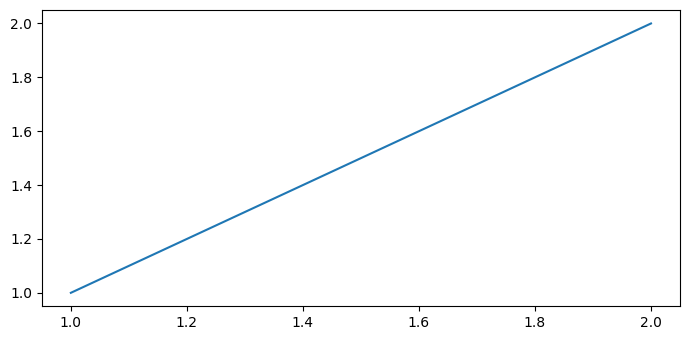

In [673]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.figure()
plt.plot([1, 2], [1, 2])
# manager = plt.get_current_fig_manager()
# manager.full_screen_toggle()
plt.show()

In [684]:
gap_minder_data.head()

""
